In [1]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

folder_data = "/Odyssey/private/t22picar/data/ssh_L4/"
file_obs = "SSH_L4_CMEMS_2019.nc" # Actually not glorys 

maps = xr.open_dataset(folder_data+file_obs)
lat = maps.latitude.values
lon = maps.longitude.values

folder_data_4th = "/Odyssey/private/t22picar/data/glorys_15m/"
file_glorys_4th = "glorys_15.81m_2019-01-01-2020-01-01_4th.nc"

maps_glo_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)

maps = maps.rename({"latitude": "lat"})
maps = maps.rename({"longitude": "lon"})
maps = maps.rename({"adt": "zos"})

# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=maps_glo_4th.lat.min(), stop=maps_glo_4th.lat.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=maps_glo_4th.lon.min(), stop=maps_glo_4th.lon.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da

new sizes: [680, 1440]


In [2]:
mean_glorys_ssh = np.nanmean(maps_glo_4th.zos.values)
mean_sat_ssh = np.nanmean(maps.zos.values)
offset = mean_glorys_ssh-mean_sat_ssh

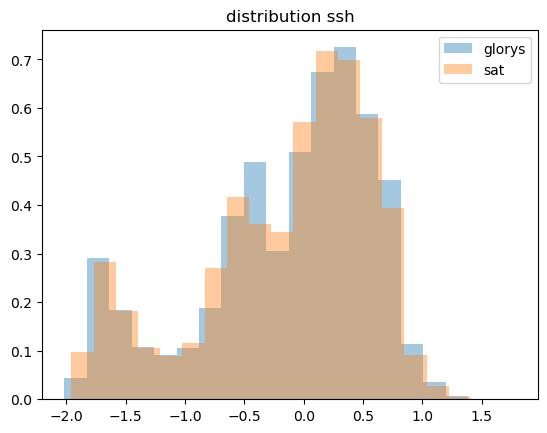

In [3]:

plt.hist(maps_glo_4th.zos.values.ravel(),20,alpha=0.4,density=True,label='glorys')
plt.hist(maps.zos.values.ravel()+offset,20,alpha=0.4,density=True,label='sat')
plt.title("distribution ssh")
plt.legend()


In [4]:
# Add offset due to different mdt
maps.zos.values = maps.zos.values + offset

(array([9.80389085e-02, 2.83231242e-01, 1.81220577e-01, 1.04722275e-01,
        8.99152039e-02, 1.15254507e-01, 2.70338771e-01, 4.16929232e-01,
        3.60157564e-01, 3.43507038e-01, 5.71908943e-01, 7.16958693e-01,
        6.98589297e-01, 5.78955764e-01, 3.94671601e-01, 9.10919043e-02,
        2.64130234e-02, 4.06184689e-03, 6.51788681e-04, 1.17637060e-04]),
 array([-1.95760153, -1.77057153, -1.58354153, -1.39651153, -1.20948153,
        -1.02245153, -0.83542153, -0.64839153, -0.46136153, -0.27433153,
        -0.08730153,  0.09972847,  0.28675847,  0.47378847,  0.66081847,
         0.84784847,  1.03487847,  1.22190847,  1.40893847,  1.59596847,
         1.78299847]),
 <BarContainer object of 20 artists>)

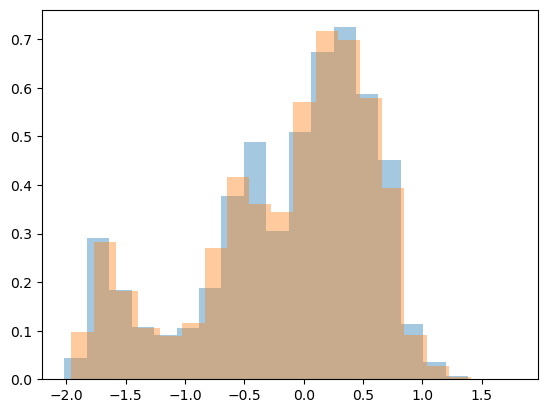

In [6]:
plt.hist(maps_glo_4th.zos.values.ravel(),20,alpha=0.4,density=True,label='glorys')
plt.hist(maps.zos.values.ravel(),20,alpha=0.4,density=True,label='sat')

In [5]:
# Interpolation new grid
maps_4th = regrid_da(new_sizes,maps)

In [8]:
#Check 
maps_4th.lon - maps_glo_4th.lon

<xarray.DataArray 'lon' (lon: 1440)> Size: 12kB
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
    depth    float32 4B ...

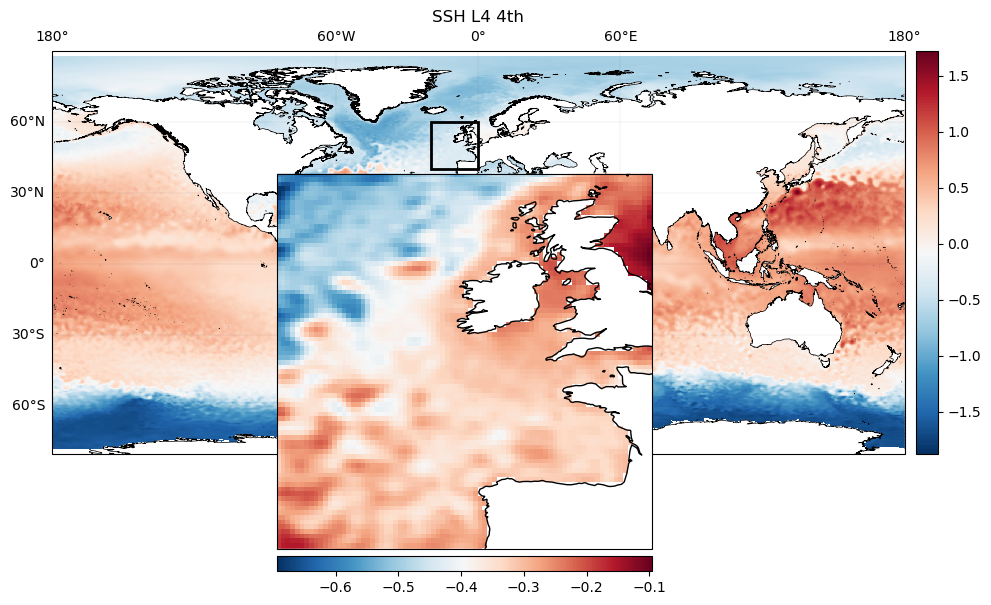

In [ ]:
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_map_zoom, plot

plot_map_zoom(maps_4th.zos[0],maps_4th.lon.values,maps_4th.lat.values,title="SSH L4 4th")

In [11]:
# save data 
save_file=file_obs[:-3]+"_4th"+".nc"
# Sauvegarder le DataArray en fichier NetCDF
maps_4th.to_netcdf(folder_data+save_file)


In [4]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

folder_data = "/Odyssey/private/t22picar/data/ssh_L4/"
file_glorys = "SSH_L4_CMEMS_2019_4th.nc" # Actually not glorys 

maps_sst = xr.open_dataset(folder_data+file_glorys)
lat_simu = maps_sst.lat.values
lon_simu = maps_sst.lon.values

folder_data_4th = "/Odyssey/private/t22picar/data/glorys_2020_15m/"
file_glorys_4th = "glorys_15.81m_2020-01-20-2021-04-20_4th.nc"
maps_glo = xr.open_dataset(folder_data_4th+file_glorys_4th)

In [6]:
maps_glo.lat

<xarray.DataArray 'lat' (lat: 680)> Size: 5kB
array([-80.      , -79.749632, -79.499264, ...,  89.499264,  89.749632,
        90.      ])
Coordinates:
    depth    float32 4B ...
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
Attributes:
    unit_long:      Degrees North
    axis:           Y
    units:          degrees_north
    standard_name:  latitude
    long_name:      Latitude

In [7]:
lon_simu

array([-179.9375    , -179.68741313, -179.43732627, ...,  179.43732627,
        179.68741313,  179.9375    ])